In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_data = pd.read_csv('all_data.csv')

In [8]:
all_data

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [6]:
all_data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [9]:
all_data['Country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [133]:
all_data['GDP_in_B'] = all_data['GDP'] / 1000000000

In [134]:
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

In [135]:
chile_data = all_data[all_data['Country'] == 'Chile']

In [136]:
germany_data = all_data[all_data['Country'] == 'Germany']

In [137]:
mexico_data = all_data[all_data['Country'] == 'Mexico']

In [138]:
usa_data = all_data[all_data['Country'] == 'United States of America']

In [139]:
china_data = all_data[all_data['Country'] == 'China']

In [140]:
zimbabwe_data = all_data[all_data['Country'] == 'Zimbabwe']

In [141]:
countries_data = [chile_data, germany_data, mexico_data, usa_data, china_data, zimbabwe_data]

In [166]:
year_2000 = all_data[all_data['Year'] == 2000]

In [167]:
year_2015 = all_data[all_data['Year'] == 2015]

# Looking at Life Expectancy/GDP Growth per Nation

## Average Life Expectancy by Nation
This is simply taking the average Life Expectancy for each of the 6 Nations over the span of the data (2000-2015).

In [156]:
avg_age_data = round(all_data.groupby('Country')['Life expectancy at birth (years)'].mean(), 1)
print(avg_age_data)

Country
Chile                       78.9
China                       74.3
Germany                     79.7
Mexico                      75.7
United States of America    78.1
Zimbabwe                    50.1
Name: Life expectancy at birth (years), dtype: float64


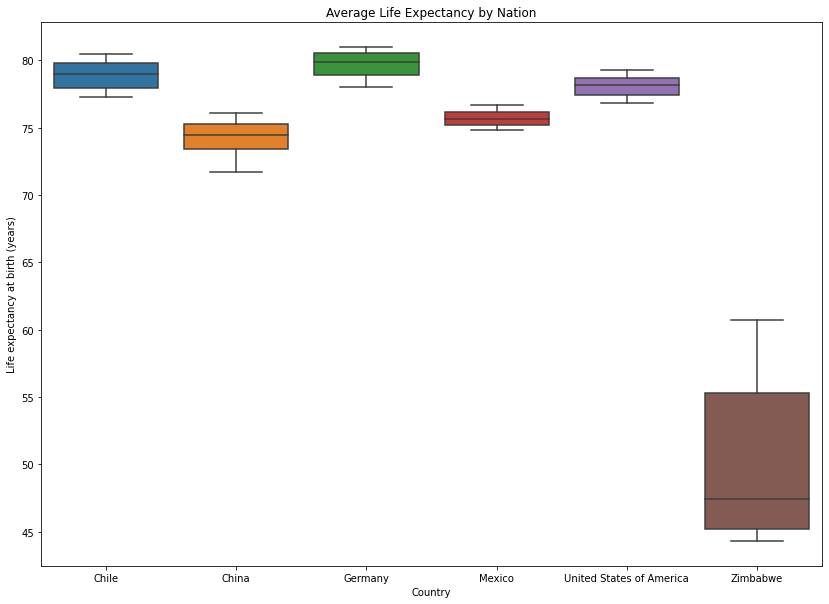

<Figure size 432x288 with 0 Axes>

In [202]:
plt.figure(figsize=(14,10))
sns.boxplot(data=all_data, x='Country', y = "Life expectancy at birth (years)" )
plt.title("Average Life Expectancy by Nation")
plt.show()
plt.clf()

## Life Expectancy per Year for Different Nations
This plot shows how Life Expecatnacy grows per year with each nation. While the 5 nations at the top have relatwively similar patterns, the plot clearly shows how Zimbabwe has the shortest life expectancy in each year. It also shows the growth that it has experainced each year after 2005.

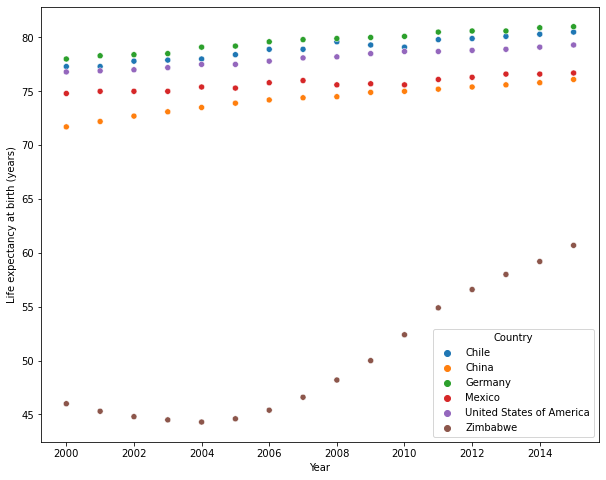

<Figure size 432x288 with 0 Axes>

In [142]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= 'Year', y = 'Life expectancy at birth (years)', data = all_data, hue = 'Country')
plt.show()
plt.clf()

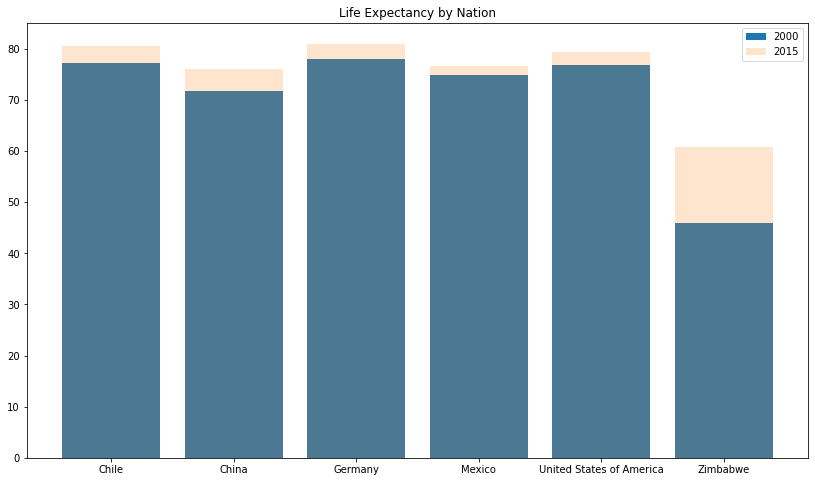

<Figure size 432x288 with 0 Axes>

In [119]:
plt.figure(figsize=(14,8))
plt.bar('Country', 'Life expectancy at birth (years)', data=year_2000, label="2000")
plt.bar('Country', 'Life expectancy at birth (years)', data=year_2015, alpha=.2, label="2015")
plt.title("Life Expectancy by Nation")
plt.legend()
plt.show()
plt.clf()

## Average GDP by Nation in Billions (USD)
This is simply taking the average GDP for each of the 6 Nations over the span of the data (2000-2015).

In [165]:
avg_lf_data = all_data.groupby('Country')['GDP'].mean()
print(avg_lf_data / 1000000000)

Country
Chile                         169.788845
China                        4957.713750
Germany                      3094.775625
Mexico                        976.650625
United States of America    14075.000000
Zimbabwe                        9.062580
Name: GDP, dtype: float64


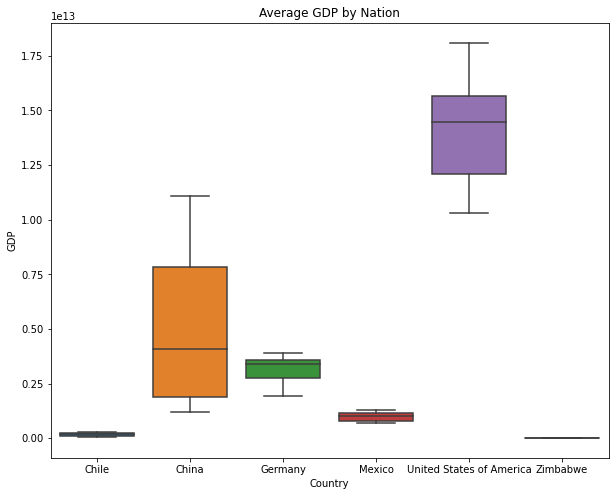

<Figure size 432x288 with 0 Axes>

In [203]:
plt.figure(figsize=(10,8))
sns.boxplot(data=all_data, x='Country', y = "GDP" )
plt.title("Average GDP by Nation")
plt.show()
plt.clf()

## GDP per Year for Different Nations
This plot highlights the massive GDP growth that both the United States and CHina have both experainced. The other four nations have stayed relatively flat in comparison.

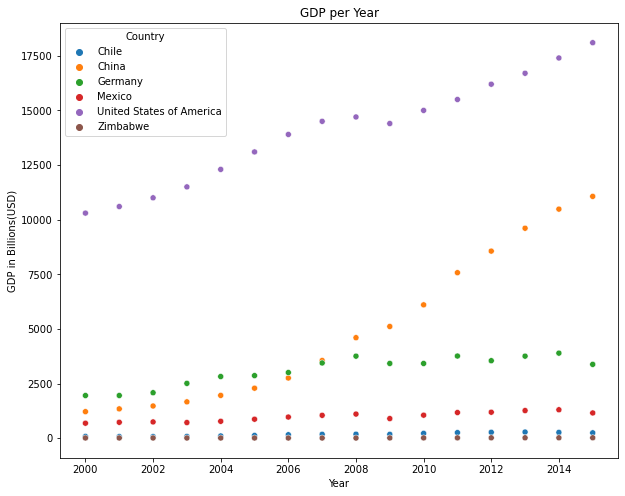

<Figure size 432x288 with 0 Axes>

In [146]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= 'Year', y = 'GDP_in_B', data = all_data, hue = 'Country')
plt.ylabel("GDP in Billions(USD)")
plt.title("GDP per Year")
plt.show()
plt.clf()

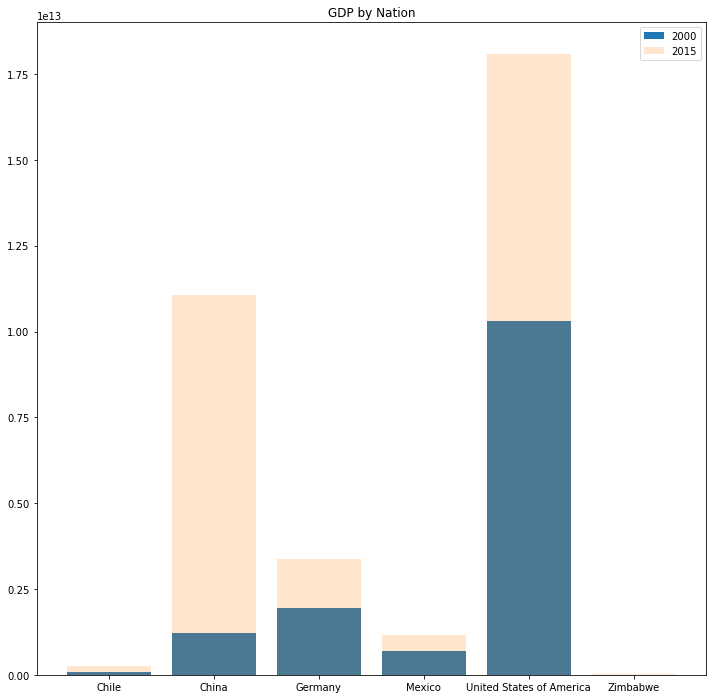

<Figure size 432x288 with 0 Axes>

In [153]:
plt.figure(figsize=(12,12))
plt.bar('Country', 'GDP', data=year_2000, label="2000")
plt.bar('Country', 'GDP', data=year_2015, alpha=.2, label="2015")
plt.title('GDP by Nation')
plt.legend()
plt.show()
plt.clf()

## Relationship between Life Expectancy and GDP
The goal of these 6 charts is to show a comparison of how strong the linear replationship is between the two variables for each country. USA clearly has the strongest relationship and China appears to have the weakest.

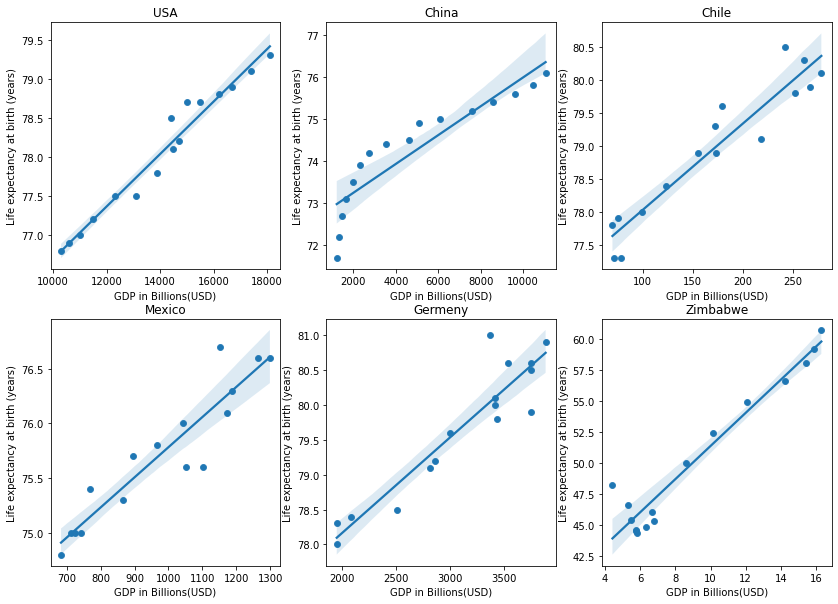

<Figure size 432x288 with 0 Axes>

In [151]:
plt.figure(figsize=(14,10))
plt.subplot(2, 3, 1)
sns.scatterplot(x= 'GDP_in_B', y = 'Life expectancy at birth (years)', data = usa_data)
sns.regplot(x= 'GDP_in_B', y = 'Life expectancy at birth (years)', data = usa_data)
plt.xlabel("GDP in Billions(USD)")
plt.title("USA")
plt.subplot(2, 3, 2)
sns.scatterplot(x= 'GDP_in_B', y = 'Life expectancy at birth (years)', data = china_data)
sns.regplot(x= 'GDP_in_B', y = 'Life expectancy at birth (years)', data = china_data)
plt.xlabel("GDP in Billions(USD)")
plt.title("China")
plt.subplot(2, 3, 3)
sns.scatterplot(x= 'GDP_in_B', y = 'Life expectancy at birth (years)', data = chile_data)
sns.regplot(x= 'GDP_in_B', y = 'Life expectancy at birth (years)', data = chile_data)
plt.xlabel("GDP in Billions(USD)")
plt.title("Chile")
plt.subplot(2, 3, 4)
sns.scatterplot(x= 'GDP_in_B', y = 'Life expectancy at birth (years)', data = mexico_data)
sns.regplot(x= 'GDP_in_B', y = 'Life expectancy at birth (years)', data = mexico_data)
plt.xlabel("GDP in Billions(USD)")
plt.title("Mexico")
plt.subplot(2, 3, 5)
sns.scatterplot(x= 'GDP_in_B', y = 'Life expectancy at birth (years)', data = germany_data)
sns.regplot(x= 'GDP_in_B', y = 'Life expectancy at birth (years)', data = germany_data)
plt.xlabel("GDP in Billions(USD)")
plt.title("Germeny")
plt.subplot(2, 3, 6)
sns.scatterplot(x= 'GDP_in_B', y = 'Life expectancy at birth (years)', data = zimbabwe_data)
sns.regplot(x= 'GDP_in_B', y = 'Life expectancy at birth (years)', data = zimbabwe_data)
plt.xlabel("GDP in Billions(USD)")
plt.title("Zimbabwe")
plt.show()
plt.clf()

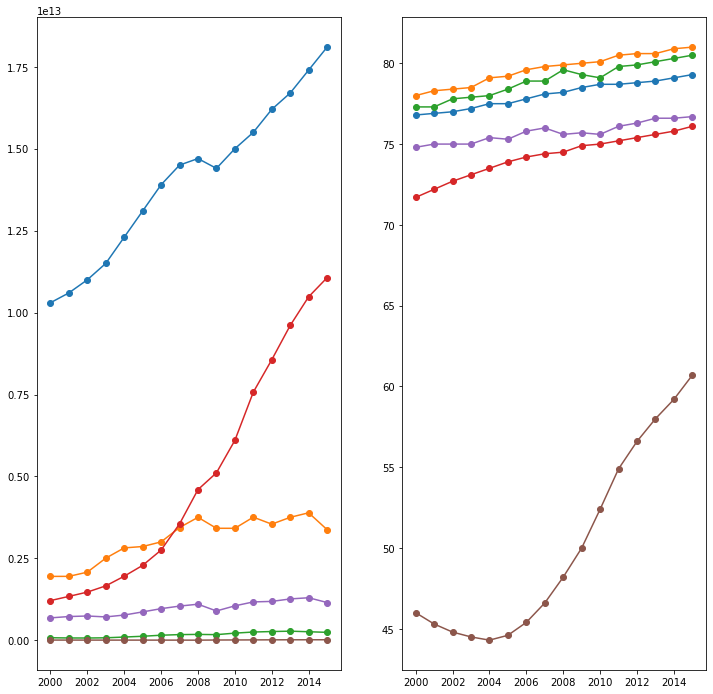

In [182]:
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.plot(usa_data['Year'], usa_data["GDP"], marker='o')
plt.plot(germany_data['Year'], germany_data["GDP"], marker='o')
plt.plot(chile_data['Year'], chile_data["GDP"], marker='o')
plt.plot(china_data['Year'], china_data["GDP"], marker='o')
plt.plot(mexico_data['Year'], mexico_data["GDP"], marker='o')
plt.plot(zimbabwe_data['Year'], zimbabwe_data["GDP"], marker='o')
plt.subplot(1, 2, 2)
plt.plot(usa_data['Year'], usa_data["Life expectancy at birth (years)"], marker='o')
plt.plot(germany_data['Year'], germany_data["Life expectancy at birth (years)"], marker='o')
plt.plot(chile_data['Year'], chile_data["Life expectancy at birth (years)"], marker='o')
plt.plot(china_data['Year'], china_data["Life expectancy at birth (years)"], marker='o')
plt.plot(mexico_data['Year'], mexico_data["Life expectancy at birth (years)"], marker='o')
plt.plot(zimbabwe_data['Year'], zimbabwe_data["Life expectancy at birth (years)"], marker='o')